In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import IFrame

# DATATIE Luento 5

Tämä luentomuistion ensimmäisen version valmisteli Arho Suominen. Vuonna 2025 DATATIEtä luennoi Jukka Huhtamäki.




# Ohjaamaton oppiminen

Opintojaksolla on tähän mennessä keskitytty ohjattuun oppimiseen. Ohjatussa oppimisessa tavoitteena on ennustaa piirre y, kun annettuna on x. Asetelma ei kuitenkaan sovi kaikkiin data-analyysitehtäviin, joten tarvetta on myös lähestymistavoille, jossa datajoukossa S = {x1, . . . , xn} ei ole erikseen määriteltyä ennustettavaa piirrettä.


![Unsupervised workflow](image/Unsupervised-Learning-Workflow-73_W640.jpg)


![Unsupervised learning workflow](image/unsupervised-learning-workflow.webp)



## Ohjaamattoman oppimisen otteita

* [Ostoskorianalyysi](https://pbpython.com/market-basket-analysis.html)
* Ryvästäminen 
* Aihemallinnus

## Ryvästäminen

Ryvästämisellä tarkoitetaan sitä, että syötteen pisteet jaetaan kokonaisuuksiin eli ryppäisiin eli klustereihin siten, että kukin rypäs sijaitseen mahdollisimman pienellä alueella, mutta ryppäät sijaitsevat mahdollisimman kaukana toisistaan.

Käytännön sovellus on siis sellainen, jossa käyttöösi on annettu tietojoukko, jossa jokaisella tapauksella on joukko yhteisiä ominaisuuksia. Tietojoukossa ei kuitenkaan ole tietoa siitä, mihin luokkaan tai luokkiin syöte kuuluu. Luokkien tunteminen on keskeistä ohjatulle algoritmille, kuten tukivektorikoneille ([Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)), joka oppii ennustamaan luokat saamansa oppimisdataan pohjautuen.

Ohjaamattomassa ryvästämisessä on keskeistä löytää keskenään erilaisia klustereita. K-Means -algoritmit ovat hyvä esimerkki ryvästämisestä. Tavoitteena on siis arvioida mihin keskuspisteeseen syöte kuuluu. K-Means -algoritmit pyrkivät löytämään keskuspisteet määrittelemällä syötteen pisteitä klustereihin, jotka perustuvat nykyisiin keskuspisteisiin. Keskuspisteiden sijaintia päivitetään laskennan edetessä vaiheittain.

In [2]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 8.8 MB/s eta 0:00:00


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
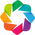

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import holoviews as hv
from holoviews import opts
# https://github.com/amueller/mglearn
# from src import mglearn
# import mglearn
hv.extension('bokeh')
%matplotlib inline

Käytetään Kaggle:stä löytyvää [elokuva-aineistoa](https://www.kaggle.com/rounakbanik/the-movies-dataset#movies_metadata.csv). Aineisto on siitä hyvä, että se vaatii aika vähän esitöitä, piirteet ovat paikallaan ja suurimmaksi osaksi aineistossa ei ole merkittäviä puutteita. Tämähän ei suinkaan ole yleistä.

Vai onko aineisto "hyvä"? Miten se selvitettäisiin?

In [8]:
df = pd.read_csv("data/the-movies-dataset/movies_metadata.csv", low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Datassa on 24 saraketta, joista useat ovat kategorisia. KMeans-analyysi ei pysty ottamaan kategorisia muuttujia, koska niiden etäisyysmitta ei ole merkityksellinen. Jos haluaisimme käyttää kategorisia muuttujia, meidän tulisi soveltaa K-Modes-analyysiä tai ratkaisua, joka yhdistää KModes- ja KMeans-analyysin.

Suositeltavaa luettavaa kategorisen datan ryvästämisestä esimerkiksi Hen (2006) [K-Mode -ryvästämistä käsittelevästä artikkelista](https://arxiv.org/ftp/cs/papers/0603/0603120.pdf). K-modes -menetelmän soveltaminen onnistuu esimerkiksi [kmodes-paketilla](https://github.com/nicodv/kmodes).

Keskitytään tässä kuitenkin KMeans-ryvästämiseen ja luodaan uusi rakenne, jossa mukana ovat vain numeerisia arvoja sisältävät sarakkeet. Pidetään mukana myös otsikko ja kuvaus mukana jatkoa varten.

In [10]:
dfNum = df[['budget','popularity','revenue','runtime','vote_average','vote_count','title','overview']]
dfNum.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,overview
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji,When siblings Judy and Peter discover an encha...
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,Just when George Banks has recovered from his ...


Aineisto on aika siisti, mutta tarkistetaan nyt vielä ainakin puuttuvat arvot ja muut keskeiset ongelmakohdat.

In [11]:
dfNum.isnull().sum()

budget            0
popularity        5
revenue           6
runtime         263
vote_average      6
vote_count        6
title             6
overview        954
dtype: int64

In [12]:
tietueita = dfNum.shape
tietueita

(45466, 8)

Tarkastellaan tyhjiä soluja sisältäviä rivejä, jos voidaan havaita puuttuuko yksittäisistä soluista tieto vai yleensä koko rivi tyhjä. Ei tunnu mielekkäältä täydentää keskiarvolla soluja jos koko havainnon tiedot tulee syötettäväksi. Tässä aineistossa näyttää siltä, että "runtime" on jäänyt usealta elokuvalta täydentämättä. Voisiko tämän täydentää?

In [13]:
dfNum[dfNum.isnull().any(axis=1)]

,budget,popularity,revenue,runtime,vote_average,vote_count,title,overview
32,0,0.745542,0.0,50.0,6.8,4.0,Wings of Courage,NaN
300,22000000,3.395867,12400000.0,108.0,6.4,7.0,Roommates,NaN
634,0,0.066123,0.0,NaN,4.0,1.0,Peanuts – Die Bank zahlt alles,NaN
635,0,0.002229,65335.0,NaN,0.0,0.0,Happy Weekend,NaN
641,0,0.821299,0.0,86.0,5.3,7.0,The Superwife,NaN
...,...,...,...,...,...,...,...,...
45342,0,0.704642,0.0,87.0,4.0,2.0,Over/Under,NaN
45377,0,0.006352,0.0,NaN,0.0,0.0,Simbad e il califfo di Bagdad,NaN
45398,1254040,0.347806,0.0,90.0,8.0,1.0,Thick Lashes of Lauri Mäntyvaara,NaN
45399,750000,0.201582,3.0,0.0,6.0,4.0,All at Once,NaN


Epäilyttävältä aineistossa vaikuttaa se, että niissä soluissa joista puuttuu "runtime", myös budjetti ja tuotto ovat nolla. Poistetaan siis nämä tietueet ja otetaan mukaan vain ne tietueet joissa kaikki arvot ovat saatavilla.

In [14]:
dfNum=dfNum.dropna()
print("Poistettuja tietueita oli: "+str(tietueita[0]-dfNum.shape[0])+", jäljellä "+str(dfNum.shape[0]))

Poistettuja tietueita oli: 960, jäljellä 44506


Poistetaan KMeans-analyysistä tekstimuotoiset muuttujat.

In [15]:
dfTitleOverview=dfNum[['title', 'overview']]
dfNum =dfNum.drop(['title', 'overview'], axis=1)

Tarkistetaan muuttujatyypit

In [16]:
dfNum = dfNum.astype(float)
dfNum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44506 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        44506 non-null  float64
 1   popularity    44506 non-null  float64
 2   revenue       44506 non-null  float64
 3   runtime       44506 non-null  float64
 4   vote_average  44506 non-null  float64
 5   vote_count    44506 non-null  float64
dtypes: float64(6)
memory usage: 2.4 MB


Pandas kuvailee dataa helposti describe() toiminnolla. Voiko tästä tehdä jotain huomioita?

In [17]:
dfNum.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.450600e+04,44506.000000,4.450600e+04,44506.000000,44506.000000,44506.000000
mean,4.311130e+06,2.971905,1.144780e+07,94.979531,5.638880,112.064621
std,1.759884e+07,6.058110,6.499713e+07,37.572923,1.896829,496.311398
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.404121,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,1.159878,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,3.803477,0.000000e+00,107.000000,6.800000,35.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


Jos laitetaan kuvaileva informaation histogrammeihin, voidaanko tästä erottaa jotain mitä aineistossa pitäisi huomioida?

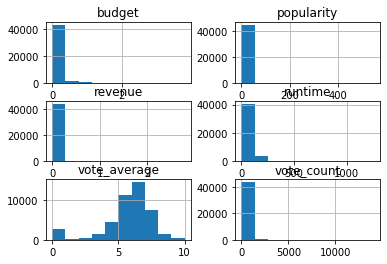

In [18]:
hist = dfNum.hist()

Poistetaan vielä budjetti- ja liikevaihtotiedot, joiden kaikissa kvartiileissa arvot ovat edelleen 0. On syytä epäillä, että merkittävässä osassa nämä tiedot ovat puutteelliset.

In [19]:
dfNum=dfNum.drop(['budget','revenue'], axis=1)

Normalisoidaan muuttujat. Normalisoinnissa on kuitenkin useita vaihtoehtoja. Kannattaa lukea Ben [Alex Green blogiteksti normalisointitavoista](http://benalexkeen.com/feature-scaling-with-scikit-learn/). Täältä löytää esimerkiksi tiedon siitä, miksi [Min Max Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) ei välttämättä ole paras normalisointi mekanismi. Mikä voisi toimia paremmin?

In [20]:
minmax = preprocessing.MinMaxScaler().fit_transform(dfNum)
dfNumNorm = pd.DataFrame(minmax, index=dfNum.index, columns=dfNum.columns)
dfNumNorm.head()

,popularity,runtime,vote_average,vote_count
0,0.040087,0.064490,0.77,0.384725
1,0.031079,0.082803,0.69,0.171439
2,0.021394,0.080414,0.65,0.006536
3,0.007049,0.101115,0.61,0.002416
4,0.015320,0.084395,0.57,0.012291


In [21]:
dfNumNorm.describe()

,popularity,runtime,vote_average,vote_count
count,44506.000000,44506.000000,44506.000000,44506.000000
mean,0.005428,0.075621,0.563888,0.007962
std,0.011065,0.029915,0.189683,0.035262
min,0.000000,0.000000,0.000000,0.000000
25%,0.000738,0.067675,0.500000,0.000213
50%,0.002119,0.075637,0.600000,0.000710
75%,0.006947,0.085191,0.680000,0.002487
max,1.000000,1.000000,1.000000,1.000000


### KMeans - miten se toimii

Miten KMeans toimii? Valitaan klustereiden määrä K. Klustereille valitaaan keskispisteet ja lasketaan jokaisen havainnon etäisyys keskipisteistä. Sijoitetaan jokainen havainto klusteriin sen perusteella, mikä keskipiste on lähimpänä. Lasketaan uudelleen keskipisteiden paikat perustuen syntyneisiin klustereihin. Toistetaan kunnes keskipisteet eivät enää muutu.

Tunnistettuja ongelmia on esimerkiksi se että 1) poikkeavat havainnot (outlier) vaikuttavat tulokseen merkittävästi ja 2) aineiston järjestys voi vaikuttaa lopputulokseen, joten analyysin stabiliteetti tulee varmistaa.

![KMeans klusterointi](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/440px-K-means_convergence.gif)

### Miten arvioida klusteiden määrä?

Ei ole mitään yksiselitteistä tapaa valita klustereiden määrää. Asiaa kannattaa tarkastella pohtimalla kyseessä olevaa ongelmakenttää. Esimerkiksi, kuinka monta klusteria voisi olla elokuva-aineistossa?

Yksi lähestymistapa aineiston klustereiden määrän valintaan on kyynärpääperiaate (engl. elbow curve). Lähestymistapa toimii niin, että lasketaan neliösumma (klusterin keskipisteen ja havaintojen etäisyyksien neliösumma) eri klustereiden määrillä. Mikäli klustereiden määrä on sama kuin datapisteiden määrä, havaintojen kuvaaja menee nollaan. Etsimme kuitenkin pistettä, jossa klustereiden määrän lisääminen tuo enää vain pienen hyödyn.

![Elbow diagram](https://upload.wikimedia.org/wikipedia/commons/c/cd/DataClustering_ElbowCriterion.JPG)

In [22]:
# Valitaan laskettavien klustereiden määrä. Mikä olisi järkevä klustereiden määrä maksimissaan.
# Onko 20 liikaa?
c = range(1, 20)
# Sovitetaan for-silmukassa KMeans kaikille c:n arvoille
kmeans = [KMeans(n_clusters=i) for i in c]
score = [kmeans[i].fit(dfNumNorm).score(dfNumNorm) for i in range(len(kmeans))]

In [23]:
hv.Curve(score)

:Curve   [x]   (y)

Valitaan kolme klusteria, jonka jälkeen näyttää olevan vain vähän hyötyä siitä että lisäämme klustereita.

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dfNumNorm)

KMeans(n_clusters=3)

In [25]:
dfNum['cluster'] = kmeans.labels_

In [26]:
dfNum.head(25)

,popularity,runtime,vote_average,vote_count,cluster
0,21.946943,81.0,7.7,5415.0,0
1,17.015539,104.0,6.9,2413.0,0
2,11.712900,101.0,6.5,92.0,0
3,3.859495,127.0,6.1,34.0,0
4,8.387519,106.0,5.7,173.0,2
5,17.924927,170.0,7.7,1886.0,0
6,6.677277,127.0,6.2,141.0,0
7,2.561161,97.0,5.4,45.0,2
8,5.231580,106.0,5.5,174.0,2
9,14.686036,130.0,6.6,1194.0,0


Katsotaan miten klusterit jakautuvat aineistossa. Tämä voi antaa suuntaviivoja siitä onko klusterointi mielekäs. Olennaistahan on ymmärtää mistä aineistosta teimme jaon.

In [27]:
bars = hv.Bars(dfNum['cluster'].value_counts())
bars

:Bars   [index]   (cluster)

Tarkastellaan aineistoa vielä sen perusteella, miten elokuvan keskiarvo ja suosio voisivat liittyä klustereihin.

In [28]:
scatter = hv.Scatter(dfNum, kdims=[ 'vote_average','popularity'], vdims=['cluster']).groupby(['cluster'])
scatter.overlay('cluster')

:NdOverlay   [cluster]
   :Scatter   [vote_average,popularity]   (cluster)

Mitä voimme arvioida kuvaajasta?

In [29]:
dfNum.head(25)

,popularity,runtime,vote_average,vote_count,cluster
0,21.946943,81.0,7.7,5415.0,0
1,17.015539,104.0,6.9,2413.0,0
2,11.712900,101.0,6.5,92.0,0
3,3.859495,127.0,6.1,34.0,0
4,8.387519,106.0,5.7,173.0,2
5,17.924927,170.0,7.7,1886.0,0
6,6.677277,127.0,6.2,141.0,0
7,2.561161,97.0,5.4,45.0,2
8,5.231580,106.0,5.5,174.0,2
9,14.686036,130.0,6.6,1194.0,0


## Luonnollisen kielen analyysi ja aihemallinnus

Aihemallinnus (topic modeling) on menetelmä dokumenttien kokoelmassa esiintyvien abstraktien "aiheiden" löytämiseksi. Aihemallinnusta käytetään dokumenttikokoelmassa olevien piilotettujen semanttisten rakenteiden löytämiseksi. Lähtökohtana on että dokumenteista on löydettävissä piirteitä erilaisista aiheista ja kokoelmassa nämä aiheet esiintyvät enemmän kuin yhdessä dokumentissa.

Lisää aihemallinnuksesta voi lukea [David M. Blein artikkeleista](http://www.cs.columbia.edu/~blei/topicmodeling.html). 
Yau, Porter, Newman ja Suominen ([2014](https://link.springer.com/article/10.1007/s11192-014-1321-8)) vertailivat eri aihemallinnusmenetelmien suorituskykyä. 
Tiedoksi myös aihemallinnusta hyödyntävä suomenkielinen artikkeli [Aihemallinnus hybridin mediatapahtuman ja merkitysten kierron tutkimuksessa](https://doi.org/10.23983/mv.91078) (Toivanen, Huhtamäki, Valaskivi ja Tikka, 2020).

![LDA](image/IntroToLDA.png)

Kuvalähde:  Sterbak ([2018](https://www.depends-on-the-definition.com/understanding-text-data-with-topic-models/))

In [30]:
IFrame("https://en.wikipedia.org/wiki/Document-term_matrix", width=1000, height=400)

In [31]:
IFrame("https://reader.elsevier.com/reader/sd/pii/S0040162516303651?token=5E5D0D4AF151658E30202F6AB22A4D30538C9A6C0C74AA16555CF19859D280BF09CA4A034137E11111F6A67077D5C911", width=1000, height=800)

Käytetään jälleen NLTK-kirjastoa tekstin esikäsittelyyn. Tätä nykyä [spaCy](https://spacy.io/) on se hyödyllisin vaihtoehto. 

In [32]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
# Hukkasanojen poisto
stopword = set(stopwords.words("english"))
translator = str.maketrans('', '', string.punctuation)

Käytetään samaa aineistoa jota käytimme aiemmin ja hyödynnetään tällä kertaan tekstiaineistoa. Arvioidaan minkälaisia piileviä aihepiirejä sisällöstä muodostuu.

In [33]:
kuvaukset=dfTitleOverview['overview'].tolist()

Kuten numeeriset muuttujat, myös luonnollinen kieli vaatii prosessointia ennen analyysiä. Tämä tulisi kuitenkin tehdä niin että emme poista kaikkea sisältöä.

In [34]:
kuvauksetPutsattu=[]
for kuvaus in kuvaukset:
        # poistetaan sanat jotka sisältävät numeron.
        kuvaus = " ".join([x for x in kuvaus.split(" ") if not x.isdigit()]) #terms consisting of only numbers removed
        # poistetaan välimerkit
        kuvaus= kuvaus.translate(translator) 
        # Pidetään vain sanat jotka ovat pidempiä kuin kolmen merkkiä
        kuvaus = " ".join(sana for sana in kuvaus.split() if len(sana)>3) #Keep words that are longer than 3
        # Poistetaan vielä kaikki sanat jotka sisältyvät hukkasanalistaan
        kuvaus = ' '.join([sana for sana in kuvaus.split() if sana not in stopword])
        kuvauksetPutsattu.append(kuvaus)

In [35]:
print("Tekstistä:\n"+kuvaukset[0]+ "\n\ntuli prosessin jälkeen:\n" + kuvauksetPutsattu[0])

Tekstistä:
Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.

tuli prosessin jälkeen:
Woody Andys toys live happily room Andys birthday brings Buzz Lightyear onto scene Afraid losing place Andys heart Woody plots Buzz circumstances separate Buzz Woody owner eventually learns aside differences


Käytetään aihemallin luomiseen suosittua [Gensim-kirjastoa](https://radimrehurek.com/gensim/). Gensim on jo pitkään käytössä ollut tekstin semanttisen analyysin kirjasto. [BERTopic](https://maartengr.github.io/BERTopic/index.html) tarjoaa kiinnostavan ja helposti lähestyttävän vaihtoehdon. 

Yleisin käyttötarkoitus on etsiä semanttisesti samankaltaisia dokumentteja. Paketti tarjoaa mahdollisuudeen tekstin esikäsittelylle, semanttisen tekstin muuttamiseksi vektoriksi sekä mallintamiseen [LSI](https://en.wikipedia.org/wiki/Latent_semantic_analysis)- ja [LDA]-(https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) algoritmien kanssa.

In [3]:
IFrame("https://radimrehurek.com/gensim/auto_examples/core/run_corpora_and_vector_spaces.html#from-strings-to-vectors", width=1000, height=800)

In [37]:
from gensim.models import Phrases
from gensim.models import Word2Vec
from gensim import corpora, models, similarities, matutils
from gensim.models import hdpmodel, ldamodel, TfidfModel

# Cleaning and creating corpus
dictionary = corpora.Dictionary(line.lower().split() for line in kuvauksetPutsattu)
limit = 1
once_ids = [tokenid for tokenid, docfreq in dictionary.dfs.items() if docfreq <= limit]
dictionary.filter_tokens(once_ids) # remove stop words and words that appear only once'
dictionary.compactify() # remove gaps in id sequence after words that were removed
dictionary.save("corpora.dict")

class MyCorpus(object):
    def __iter__(self):
        for line in kuvauksetPutsattu:
            # assume there's one document per line, tokens separated by whitespace
            yield dictionary.doc2bow(line.lower().split())
mem_friendly_corpus = MyCorpus() # doesn't load the corpus into memory!
corpora.MmCorpus.serialize('corpus.mm', mem_friendly_corpus)
#corpora.BleiCorpus.serialize(CorpusBlei, mem_friendly_corpus, id2word=dictionary)

dictionary = corpora.Dictionary.load("corpora.dict")

analysisCorpus = corpora.MmCorpus('corpus.mm')

Samoin kuin KMeans-analyysissä, on meidän pyrittävä arvioimaan mielekäs määrä piileviä osajoukkoja aineistossa. [Chang et al.](http://users.umiacs.umd.edu/~jbg/docs/nips2009-rtl.pdf) kuvaavat hyvin, että piilevien luokkien määrä on todennäköisesti helpoiten arvioitavissa havainnoimalla tuloksia. Tarjolla on kuitenkin myös muita mahdollisuuksia, kuten KL-divergenssi ([Arun et al. 2010](https://link.springer.com/chapter/10.1007/978-3-642-13657-3_43))

In [38]:
# Estimate KL Divergence to input
# Hard coded to range 1 -100 step 1 
# Returns a list of values
import scipy.stats as stats

def sym_kl(p,q):
    return np.sum([stats.entropy(p,q),stats.entropy(q,p)])

def arun(corpus,dictionary):
    
    l = np.array([sum(cnt for _, cnt in doc) for doc in corpus])
    kl = []
    for i in range(1,20,1):
        lda = models.ldamodel.LdaModel(corpus=corpus,
            id2word=dictionary,num_topics=i)
        m1 = lda.expElogbeta
        U,cm1,V = np.linalg.svd(m1)
        # Document-topic matrix
        lda_topics = lda[analysisCorpus]
        m2 = matutils.corpus2dense(lda_topics, lda.num_topics).transpose()
        cm2 = l.dot(m2)
        cm2 = cm2 + 0.0001
        cm2norm = np.linalg.norm(l)
        cm2 = cm2/cm2norm
        kl.append(sym_kl(cm1,cm2))
    return kl

In [39]:
kl = arun(analysisCorpus, dictionary)

In [40]:
hv.Curve(kl)

:Curve   [x]   (y)

KL-divergenssin perusteella valitsemme 3 piilevää teemaa.

In [41]:
# Run LDA
n_topics=3
n_docs=len(kuvauksetPutsattu)

lda = models.ldamodel.LdaModel(analysisCorpus, id2word=dictionary, num_topics=n_topics)
lda_corpus = lda[analysisCorpus]
# lda.save(LDA_model)

Piilevät teemat kuvautuvat sana-teema -matriisina, jossa jokaisella sanalla on todennäköisyys kuulua jokaiseen piilevään teemaan. Oheinen koodin tulostaa jokaisesta teemasta 10 todennäköisintä sanaa.

In [42]:
temp_terms = lda.show_topics(num_topics=int(n_topics), num_words=11, log=False, formatted=False)
index = 0
topTerms={}
for topic in range(n_topics):
    for wordn in range(11):
        try:
            topTerms['Topic '+str(topic+1)].append(temp_terms[topic][1][wordn][0])
        except KeyError:
            topTerms['Topic '+str(topic+1)]=[temp_terms[topic][1][wordn][0]]
ldaTermsDf=pd.DataFrame(topTerms)
ldaTermsDf

,Topic 1,Topic 2,Topic 3
0,life,world,school
1,film,must,young
2,love,group,when
3,young,find,life
4,story,story,family
5,woman,when,police
6,family,people,find
7,time,back,high
8,first,american,father
9,years,save,town


Olemmeko luoneet oheisella jaottelulla mielekkäitä elokuvaluokkia? Tämä on ehkä hieman kyseenalaista, mutta palataan takaisin aikaisempaan katsomaa miltä luokat näyttävät isosta aineistosta.

In [43]:
IFrame("https://rajapinta.co/2017/07/08/varovaisuutta-aihemallinnuksen-kanssa/", width=1000, height=800)

In [44]:
hardCluster=[]
docProb=[]
for y in range(0, n_docs):
    prob=lda[lda_corpus[y]]
    hc=max(lda[lda_corpus[y]],key=lambda item:item[1])
    hardCluster.append(hc[0])
    probList=[]
    for i in prob:
             probList.append(i[1])
    docProb.append(probList)
probDf=pd.DataFrame(docProb, columns=['Topic 1','Topic 2','Topic 3'])
probDf.head()

,Topic 1,Topic 2,Topic 3
0,0.175509,0.323548,0.500944
1,0.173771,0.194033,0.632197
2,0.168576,0.234822,0.596602
3,0.173554,0.615290,0.211156
4,0.217061,0.184019,0.598920


Topic modeling -algoritmi on pehmeän luokittelun (soft classification) algoritmi, jossa jokainen termi ja dokumentti saa todennäköisyyden kaikkiin teemoihin. Tämä vaatii osaltaan oikeanlaista lähestymistavan valintaa. Jos esimerkiksi valitsemme vain korkeimman todennäköisyyden luokan menetämme paljon informaatiota.

In [45]:
dfNum['topics']=hardCluster

In [46]:
dfNum['title']=dfTitleOverview['title']

Onko luokitteluissa järkeä?

In [47]:
dfNum.head(25)

,popularity,runtime,vote_average,vote_count,cluster,topics,title
0,21.946943,81.0,7.7,5415.0,0,2,Toy Story
1,17.015539,104.0,6.9,2413.0,0,2,Jumanji
2,11.712900,101.0,6.5,92.0,0,2,Grumpier Old Men
3,3.859495,127.0,6.1,34.0,0,1,Waiting to Exhale
4,8.387519,106.0,5.7,173.0,2,2,Father of the Bride Part II
5,17.924927,170.0,7.7,1886.0,0,2,Heat
6,6.677277,127.0,6.2,141.0,0,2,Sabrina
7,2.561161,97.0,5.4,45.0,2,1,Tom and Huck
8,5.231580,106.0,5.5,174.0,2,2,Sudden Death
9,14.686036,130.0,6.6,1194.0,0,2,GoldenEye


In [48]:
dfNum.pivot_table(index='cluster', columns='topics', aggfunc={'topics':len}, fill_value=0)

topics             
topics       0     1      2
cluster                    
0          983  3104  20937
1          105   432   2821
2          455  2389  13280

Zemaityte ja muut ([2024](https://doi.org/10.1371/journal.pone.0297404)) soveltavat luovasti tekstin semanttista analyysia elokuvafestivaaleja käsittelevässä tutkimuksessaan. Myös [tutkimusaineisto](https://doi.org/10.6084/m9.figshare.22682794.v1) on julkaistu.

Käydään vielä katsomassa [Googlen prosessikuvaa](https://cloud.google.com/blog/products/gcp/google-patents-public-datasets-connecting-public-paid-and-private-patent-data), joka kertoo hyvin sen miten dataa tyypillisesti koostetaan useista lähteistä.

## Yhteenveto

Vedetään lopuksi yhteen keskeiset havainnot ohjaamattomasta oppimisesta

1. Ohjaamattoman oppisen menetelmiä ovat esimerkiksi ryvästäminen, aihemallinnus, ostoskorianalyysi ja verkostoanalyysi
1. Myös ohjaamattomassa oppimisessa tapahtuu ohjaamista. Esimerkiksi klustereiden määrän valinta KMeans-algoritmia sovellettaessa tai aiheiden määrä aihemallinnuksessa. 
3. Aineiston laadun merkitys: garbage in, garbage out -periaate pätee
4. Etenkin aihemallinnus on hyvin subjektiivista  
5. Aineiston eksploratiivisen analytiikan rooli on keskeinen

Mitä opimme tänään?

1. Myös ohjaamattomassa oppimisessa analyytikon rooli on keskeinen, aktiivinen. Esimerkiksi klustereiden määrä on valittava.
2. Etenkin aihemallinnuksessa subjektiivisuus ja tulosten laadullinen tulkinta korostuu.
3. Aineiston laadu on ehdoton edellytys analyysin onnistumiselle myös ohjaamattomassa oppimisessa. Roskaa sisään, roskaa ulos.